In [2]:
import numpy as np
import pandas as pd
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import folium

###### 한글 깨지는 것 막기
import matplotlib.font_manager as fm
# 폰트 이름 뽑기
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"]=False


# 플롯 스타일 
#plt.style.use("fivethirtyeight")

# 크롤링
# BeautifulSoup
from bs4 import BeautifulSoup
# urllib
import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
# Selenium 웹드라이버
from selenium import webdriver
import requests

# 에러 경고 안뜨게 하기
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm_notebook

#중간중간 1초 정도 간격을 두고 다운로드 받도록 설정
import time

# pip install mglearn
import mglearn

# scikit-learn 샘플
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.neighbors import KNeighborsRegressor

# 훈련용 데이터와 테스트용 데이터를 알아서 분류해주는 라이브러리
from sklearn.model_selection import train_test_split

# Cross Validation KFold 
from sklearn.model_selection import KFold

# 예측값이 얼만큼 맞았는가 확인해주는 함수
from sklearn.metrics import accuracy_score

# 교차 검증 함수
from sklearn.model_selection import cross_val_score, cross_validate

# 교차 검증 및 하이퍼 파라미터 튜닝 함수
from sklearn.model_selection import GridSearchCV

In [8]:
auction= pd.read_csv("C:/Users/dongz/OneDrive/문서/final_project/data/auction/auction_final.csv")
auction.head()

,office,num,case_year,cat,addr,load_addr,dong,bunji,detail_dong,detail_ho,...,lowest,hammer,date,year,month,day,status,low_per,ham_per,comment
0,서울동부1계,2020-55340,2020,아파트,"서울특별시 성동구 성수동1가 718, 103동 29층2902호 (성수동1가,트리마제)",NaN,서울특별시 성동구 성수동1가,718,103동,2902호,...,2480000000,NaN,2021-08-02,2021,8,2,유찰1회,80,NaN,NaN
1,서울동부4계,2020-55715,2020,아파트,"서울특별시 성동구 홍익동 53, 101동 10층1005호 (홍익동,청계대주파크빌)",NaN,서울특별시 성동구 홍익동,53,101동,1005호,...,391000000,NaN,2021-08-09,2021,8,9,신건,100,NaN,토지및건물 지분매각
2,서울서부6계,2019-52798,2019,아파트,"서울특별시 서대문구 연희동 194-30, 3층비312호 (연희동,브라운스톤 연희)",NaN,서울특별시 서대문구 연희동,194-30,NaN,비312호,...,10720000,NaN,2021-08-10,2021,8,10,유찰13회,5,NaN,대항력있는임차인
3,서울서부3계,2019-54121,2019,아파트,"서울특별시 서대문구 연희동 194-30, 3층비314호 (연희동,브라운스톤 연희)",NaN,서울특별시 서대문구 연희동,194-30,NaN,비314호,...,13058000,NaN,2021-08-10,2021,8,10,유찰12회,7,NaN,대항력있는임차인
4,서울서부6계,2020-2843,2020,아파트,서울특별시 서대문구 홍제동 470 제일아파트 제101동 6층603호,NaN,서울특별시 서대문구 홍제동,470,제101동,603호,...,478000000,NaN,2021-08-10,2021,8,10,신건,100,NaN,"대지권미등기,대항력있는임차인"


In [3]:
auction.shape

(1095, 25)

In [4]:
auction.isnull().sum()

office           0
num              0
case_year        0
cat              0
addr             0
load_addr      721
dong             0
bunji            0
detail_dong    114
detail_ho        7
floor            5
brand          168
build_area       1
land_area       43
price            0
lowest           0
hammer         147
date             0
year             0
month            0
day              0
status           0
low_per          0
ham_per        302
comment        830
dtype: int64

In [19]:
auction["status"].unique()

array(['유찰1회', '신건', '유찰13회', '유찰12회', '유찰3회', '유찰', '유찰2회', '유찰9회',
       '유찰4회', '매각', '배당종결'], dtype=object)

In [9]:
# 경매 종결 건의 낙찰가 missing value를 최저가로 대체하기
auction[auction["status"]=="배당종결"]["hammer"].fillna(auction["lowest"], inplace=True)
auction[auction["status"]=="매각"]["hammer"].fillna(auction["lowest"], inplace= True)

# auction[auction["status"]=="신건"]

In [8]:
auction.isnull().sum()

office           0
num              0
case_year        0
cat              0
addr             0
load_addr      721
dong             0
bunji            0
detail_dong    114
detail_ho        7
floor            5
brand          168
build_area       1
land_area       43
price            0
lowest           0
hammer           0
date             0
year             0
month            0
day              0
status           0
low_per          0
ham_per        302
comment        830
dtype: int64

In [13]:
# 낙찰가, 감정가, 최저가 총액
print("감정가 총액 : ", int(round(auction["price"].sum()/100000000,0)), "억원")

print("낙찰가 총액 : ", int(round(auction["hammer"].sum()/100000000,0)), "억원")

print("최저가가 총액 : ", int(round(auction["lowest"].sum()/100000000,0)), "억원")

print("=========================================")
# 감정가(price) descriptive statistics
print("감정가 기술통계량: ","\n",auction["price"].describe(include='int'))

print("=========================================")
# 낙찰가(hammer price) descriptive statistics
print("낙찰가 기술통계량: ", "\n", auction["hammer"].describe(include='int'))

print("=========================================")
# 최저가(lowest price) descriptive statistics
print("최저가 기술통계량: ","\n",auction["lowest"].describe(include='int'))

감정가 총액 :  7983 억원
낙찰가 총액 :  7154 억원
최저가가 총액 :  7140 억원
감정가 기술통계량:  
 count    1.095000e+03
mean     7.290732e+08
std      6.184863e+08
min      2.500000e+07
25%      3.480000e+08
50%      5.660000e+08
75%      9.000000e+08
max      6.470000e+09
Name: price, dtype: float64
낙찰가 기술통계량:  
 count    9.480000e+02
mean     7.546004e+08
std      6.159745e+08
min      2.030000e+07
25%      3.607125e+08
50%      6.113350e+08
75%      9.422858e+08
max      6.011000e+09
Name: hammer, dtype: float64
최저가 기술통계량:  
 count    1.095000e+03
mean     6.520250e+08
std      5.268990e+08
min      1.072000e+07
25%      3.010000e+08
50%      5.160000e+08
75%      8.320000e+08
max      4.140800e+09
Name: lowest, dtype: float64


In [8]:
auction["build_area"].unique()

array([ 84.5402,  42.47  ,  17.01  ,  16.62  ,  80.11  ,  84.69  ,
        77.65  ,  84.9   ,  57.36  ,  84.79  ,  67.77  ,  84.93  ,
        84.17  ,  80.1913, 200.99  ,  68.2097,  37.08  ,  14.4   ,
        32.725 ,  59.94  ,  16.93  ,  46.32  ,  11.21  ,  39.15  ,
       131.4   ,  25.7   ,  29.51  ,  29.74  ,  53.58  ,  12.97  ,
       142.034 , 171.1005, 200.4   ,  53.01  , 177.62  ,  12.19  ,
        84.76  ,  29.9   , 163.91  ,  84.65  ,  47.3   ,  74.01  ,
        66.03  ,  84.866 ,   6.72  ,  77.349 , 109.1   , 121.63  ,
        84.87  ,  23.37  , 127.33  ,  84.6824,  22.24  ,  64.78  ,
       119.8906,  81.68  ,  33.74  , 141.32  ,  72.34  ,  32.76  ,
        84.96  ,  59.91  , 120.97  , 101.32  ,  38.47  ,  85.    ,
        14.28  ,  84.5839, 114.93  ,  58.09  , 139.28  ,  42.43  ,
        84.89  ,  84.88  ,  72.63  , 134.2   , 147.4   ,  14.06  ,
       236.07  ,  59.9858, 114.926 ,  59.65  ,  13.32  ,  84.97  ,
        45.44  ,  49.5   , 131.3   , 140.51  ,  84.84  ,  24.7

In [18]:
# 경매 매물 평균 면적
print("경매 매물 평균 면적: ", auction["build_area"].mean())
print("===============================================================")

# 경매 매물 면적 descriptive statistics
print("경매 매물 평균 면적 기술통계량", "\n",auction["build_area"].describe())

경매 매물 평균 면적:  86.12152065813518
경매 매물 평균 면적 기술통계량 
 count    1094.000000
mean       86.121521
std        44.294671
min         6.720000
25%        59.670000
50%        84.760000
75%       113.047500
max       364.040000
Name: build_area, dtype: float64


In [30]:
auction.isnull().sum()

office           0
num              0
case_year        0
cat              0
addr             0
load_addr      721
dong             0
bunji            0
detail_dong    114
detail_ho        7
floor            5
brand          168
build_area       1
land_area       43
price            0
lowest           0
hammer         147
date             0
year             0
month            0
day              0
status           0
low_per          0
ham_per        302
comment        830
dtype: int64

In [19]:
# 낙찰가, 감정가 비율 missing value 채워넣기

auction["ham_per"]=auction["ham_per"].fillna(round(auction["hammer"]/auction["price"]*100,0))



In [20]:
auction.isnull().sum()

office           0
num              0
case_year        0
cat              0
addr             0
load_addr      721
dong             0
bunji            0
detail_dong    114
detail_ho        7
floor            5
brand          168
build_area       1
land_area       43
price            0
lowest           0
hammer         147
date             0
year             0
month            0
day              0
status           0
low_per          0
ham_per        147
comment        830
dtype: int64

In [36]:
### 파일 저장
auction.to_csv("C:/csong1/R/data/auction_eda.csv")

In [37]:
auction= pd.read_csv("C:/csong1/R/data/auction_eda.csv")

<AxesSubplot:>

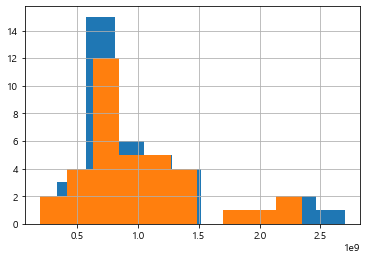

In [38]:
mean_by_floor= auction.groupby(["floor"]).mean()
mean_by_floor["price"].hist(bins=10)
mean_by_floor["hammer"].hist(bins=10)

Text(0, 0.5, '감정가')

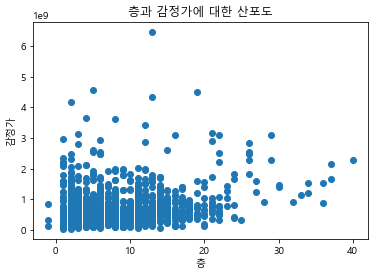

In [39]:
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.scatter(auction["floor"],auction["price"])
ax.set_title("층과 감정가에 대한 산포도")
ax.set_xlabel("층")
ax.set_ylabel("감정가")

Text(0, 0.5, '감정가')

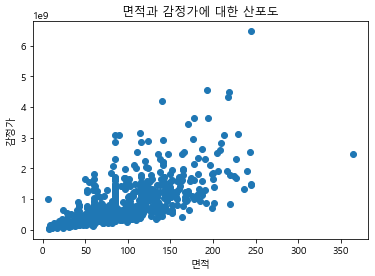

In [40]:
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.scatter(auction["build_area"],auction["price"])
ax.set_title("면적과 감정가에 대한 산포도")
ax.set_xlabel("면적")
ax.set_ylabel("감정가")

In [41]:
auction1= auction.set_index(["year", "month"])
auction1= auction1.sort_values(by=["year", "month"])

<AxesSubplot:xlabel='year,month'>

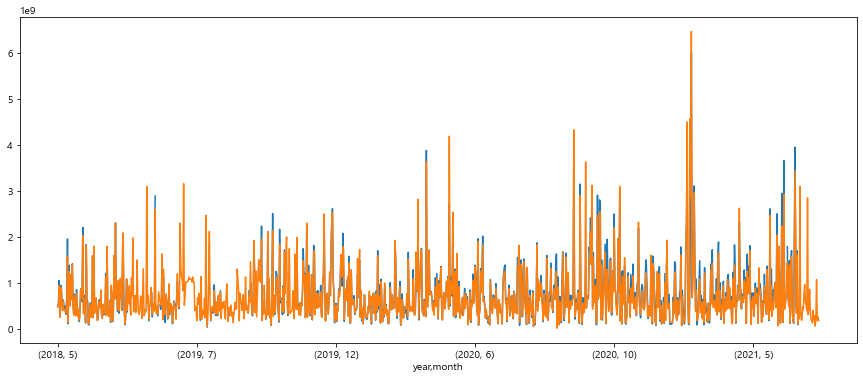

In [42]:
## 2018년부터 월별 낙찰가 및 감정가 추이
auction1["hammer"].plot(kind="line", figsize=(15,6))
auction1["price"].plot(kind="line", figsize=(15,6))

In [59]:
mean_by_dong= auction.groupby(auction["dong"]).mean()
mean_by_dong

,case_year,floor,build_area,land_area,price,lowest,hammer,year,month,day,low_per,ham_per
dong,,,,,,,,,,,,
서울 강남구 역삼동,2018.000000,2.500000,76.210000,39.750000,7.930000e+08,7.208000e+08,7.870550e+08,2018.000000,10.000000,10.000000,90.000000,99.500000
서울 강동구 천호동,2018.000000,18.000000,59.900000,8.700000,4.100000e+08,3.280000e+08,4.230000e+08,2018.000000,10.000000,8.000000,80.000000,103.000000
서울 강북구 수유동,2018.000000,7.750000,15.922500,4.954250,1.165000e+08,7.892000e+07,9.459500e+07,2018.250000,9.250000,21.750000,68.000000,81.500000
서울 강서구 등촌동,2018.000000,8.000000,61.860000,25.781000,4.120000e+08,3.296000e+08,3.799000e+08,2019.000000,4.000000,24.000000,80.000000,92.000000
서울 강서구 화곡동,2018.000000,1.000000,125.021000,70.070000,6.900000e+08,6.900000e+08,7.199900e+08,2018.000000,10.000000,2.000000,100.000000,104.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
서울특별시 중랑구 면목동,2019.000000,8.928571,77.897593,28.670429,4.427857e+08,4.224714e+08,4.513655e+08,2019.857143,6.142857,19.000000,94.285714,100.285714
서울특별시 중랑구 묵동,2018.500000,4.500000,76.097500,43.240750,4.270000e+08,3.892900e+08,4.948064e+08,2019.500000,8.750000,10.750000,91.000000,118.250000
서울특별시 중랑구 상봉동,2020.000000,10.000000,84.920000,26.100000,4.000000e+08,4.000000e+08,4.320150e+08,2020.000000,9.000000,28.000000,100.000000,108.000000


In [43]:
auction["구"]= auction["dong"].str.extract("(\w+구)")

In [55]:
mean_by_gu=auction.groupby(auction["구"]).mean()
mean_by_gu.reset_index(inplace=True)
mean_by_gu

,구,Unnamed: 0,case_year,floor,build_area,land_area,price,lowest,hammer,year,month,day,low_per,ham_per,gu_color,gangnam_color
0,강남구,586.895833,2018.687500,7.395833,111.957919,53.317526,1.839531e+09,1.538935e+09,1.856937e+09,2019.625000,7.229167,13.645833,87.958333,102.682927,1.0,1.0
1,강동구,517.604167,2018.854167,7.562500,91.627854,38.373960,6.618646e+08,5.763375e+08,6.962935e+08,2019.770833,7.395833,13.020833,87.416667,108.878049,2.0,0.0
2,강북구,568.038462,2019.000000,8.440000,76.497500,35.701623,4.321846e+08,3.896046e+08,4.559882e+08,2019.769231,5.923077,17.653846,86.153846,101.041667,3.0,0.0
3,강서구,469.263158,2019.078947,6.760000,72.314374,33.896499,5.346366e+08,4.857438e+08,5.774066e+08,2019.947368,6.723684,14.644737,88.118421,102.149254,4.0,0.0
4,관악구,591.170732,2018.829268,7.853659,82.567683,34.010005,4.900976e+08,4.439356e+08,5.168225e+08,2019.707317,6.024390,13.804878,88.975610,102.578947,5.0,0.0
5,광진구,508.925926,2018.925926,7.259259,119.720259,62.921288,9.898704e+08,9.203074e+08,1.038781e+09,2019.851852,6.777778,18.111111,94.074074,108.166667,6.0,0.0
6,구로구,561.228070,2018.912281,9.912281,75.560760,31.934302,4.402384e+08,4.047065e+08,4.940719e+08,2019.771930,6.122807,15.228070,88.982456,106.580000,7.0,0.0
7,금천구,622.333333,2018.714286,10.428571,69.687857,29.682333,3.429524e+08,3.117417e+08,3.586949e+08,2019.714286,5.095238,15.476190,88.333333,101.277778,8.0,0.0
8,노원구,616.072289,2018.879518,8.268293,67.769828,33.283812,4.064699e+08,3.712039e+08,4.300260e+08,2019.662651,6.084337,15.349398,91.228916,108.821918,9.0,0.0
9,도봉구,615.652174,2018.826087,7.555556,79.411298,35.091611,3.838043e+08,3.426070e+08,3.997664e+08,2019.586957,6.913043,15.826087,88.434783,104.625000,10.0,0.0


Text(0, 0.5, '낙찰가')

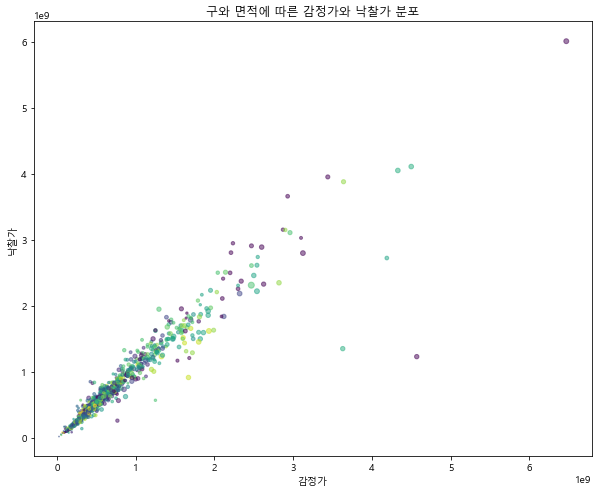

In [45]:
def record_gu(gu):
    if gu=='강남구':
        return 1
    elif gu=='강동구':
        return 2
    elif gu=='강북구':
        return 3
    elif gu=='강서구':
        return 4
    elif gu=='관악구':
        return 5
    elif gu=='광진구':
        return 6
    elif gu=='구로구':
        return 7
    elif gu=='금천구':
        return 8
    elif gu=='노원구':
        return 9
    elif gu=='도봉구':
        return 10
    elif gu=='동대문구':
        return 11
    elif gu=='동작구':
        return 12
    elif gu=='마포구':
        return 13
    elif gu=='서대문구':
        return 14
    elif gu=='서초구':
        return 15
    elif gu=='성동구':
        return 16
    elif gu=='성북구':
        return 17
    elif gu=='송파구':
        return 18
    elif gu=='양천구':
        return 19
    elif gu=='영등포구':
        return 20
    elif gu=='용산구':
        return 21
    elif gu=='은평구':
        return 22
    elif gu=='종로구':
        return 23
    elif gu=='중구':
        return 24
    elif gu=='중랑구':
        return 25


    
auction["gu_color"]= auction["구"].apply(record_gu)
auction.head()

fig=plt.figure(figsize=(10,8))
ax= fig.add_subplot(1,1,1)
ax.scatter(auction["price"],auction["hammer"], c=auction["gu_color"], alpha=0.5, s=auction["build_area"]*0.1, label=auction["구"])
ax.set_title("구와 면적에 따른 감정가와 낙찰가 분포")
ax.set_xlabel("감정가")
ax.set_ylabel("낙찰가")


[Text(0.5, 16.699999999999996, '구'), Text(17.137499999999996, 0.5, '낙찰가')]

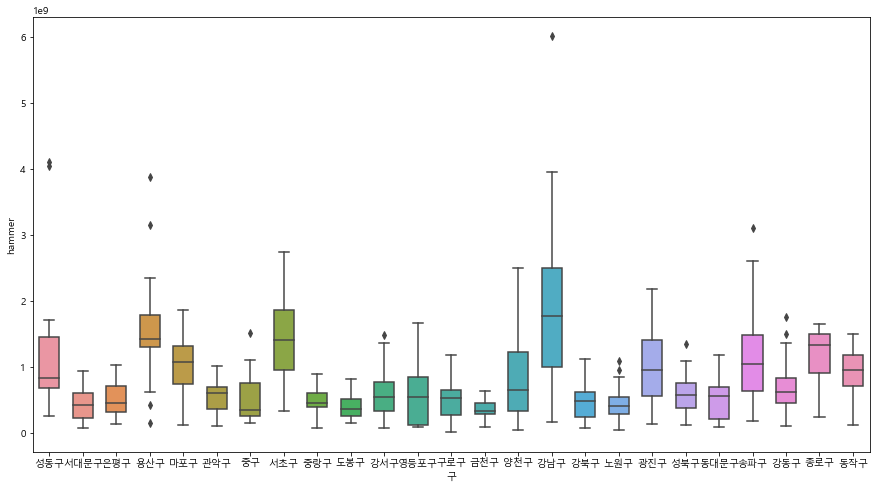

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(x=auction["구"], y=auction["hammer"], data=auction, 
                saturation=0.75, width=0.6,
                fliersize=5)

ax.set(xlabel='구', ylabel='낙찰가')



[Text(0.5, 16.699999999999996, '구'), Text(17.137499999999996, 0.5, '낙찰가')]

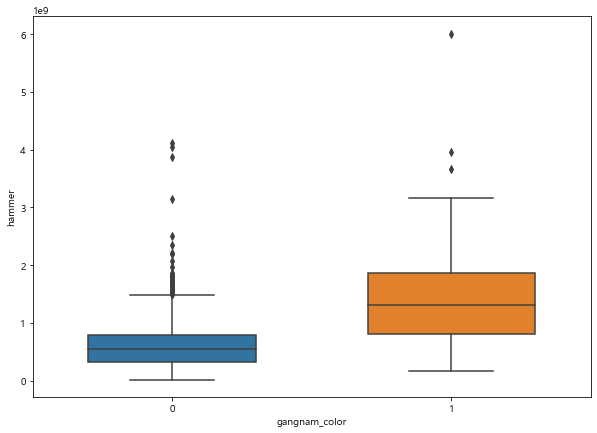

In [47]:
def record_gangnam(gu):
    if gu=='강남구':
        return 1
    elif gu=='서초구':
        return 1
    elif gu=='송파구':
        return 1
    else:
        return 0

    
auction["gangnam_color"]= auction["구"].apply(record_gangnam)
auction.head()

plt.figure(figsize=(10,7))
sns.boxplot(x=auction["gangnam_color"], y=auction["hammer"], data=auction, 
                saturation=0.75, width=0.6,
                fliersize=5)

ax.set(xlabel='구', ylabel='낙찰가')


In [112]:
mean_by_gu.to_csv("C:/Users/dongz/OneDrive/문서/final_project/chsong/mean_by_gu.csv")

In [3]:
mean_by_gu=pd.read_csv("C:/Users/dongz/OneDrive/문서/final_project/chsong/mean_by_gu.csv")

In [49]:
### 구별 감정가 히트맵 구현
map=folium.Map(location=[37.485242, 126.981770],zoom_start=15)
map


In [4]:
import json
seoul_geo="C:/csong1/pythonwork/analysis/data/seoul/skorea_municipalities_geo_simple_seoul.json"
seoul_str=json.load(open(seoul_geo,encoding="utf-8"))

In [5]:
from folium import plugins

In [6]:
# 구별 평균 경매 감정가

map=folium.Map(location=[37.485242, 126.981770], zoom_start=10)
map.choropleth(geo_data=seoul_str, data=mean_by_gu, key_on="feature.properties.name",
              columns=["구", "price"], fill_color="YlGnBu", 
               fill_opacity=0.7, line_opacity=0.5,
              legend_name="구별 평균 감정가")

# 지도 전체화면 플러그인
plugins.Fullscreen(position='topright', title="전체화면보기", title_cancel="전체화면끄기", force_separate_button=True).add_to(map)

# 마우스 스크롤
plugins.MousePosition().add_to(map)

map

In [114]:
# 구별 평균 경매 낙찰가

map=folium.Map(location=[37.485242, 126.981770], zoom_start=10)
map.choropleth(geo_data=seoul_str, data=mean_by_gu, key_on="feature.properties.name",
              columns=["구", "hammer"], fill_color="YlGnBu", 
               fill_opacity=0.7, line_opacity=0.5,
              legend_name="구별 평균 낙찰가")

# 지도 전체화면 플러그인
plugins.Fullscreen(position='topright', title="전체화면보기", title_cancel="전체화면끄기", force_separate_button=True).add_to(map)

# 마우스 스크롤
plugins.MousePosition().add_to(map)

map

In [7]:
# 구별 평균 경매 낙찰가/감정가 비율

map=folium.Map(location=[37.485242, 126.981770], zoom_start=10)
map.choropleth(geo_data=seoul_str, data=mean_by_gu, key_on="feature.properties.name",
              columns=["구", "ham_per"], fill_color="YlGnBu", 
               fill_opacity=0.7, line_opacity=0.5,
              legend_name="구별 평균 낙찰/감정가 비율")

# 지도 전체화면 플러그인
plugins.Fullscreen(position='topright', title="전체화면보기", title_cancel="전체화면끄기", force_separate_button=True).add_to(map)

# 마우스 스크롤
plugins.MousePosition().add_to(map)

map

In [22]:
auction["floor"].describe()

count    1090.000000
mean        8.353211
std         6.257485
min        -1.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        40.000000
Name: floor, dtype: float64

In [38]:
min_floor= auction["floor"].min()
max_floor= auction["floor"].max()
print(min_floor, max_floor)

bins= np.linspace(min_floor, max_floor, 4)
print(bins)
labels=["low", "middle", "high"]

auction["floor_bins"]=pd.cut(auction["floor"], bins= bins, labels=labels, include_lowest=False)

-1.0 40.0
[-1.         12.66666667 26.33333333 40.        ]


<AxesSubplot:xlabel='floor_bins', ylabel='hammer'>

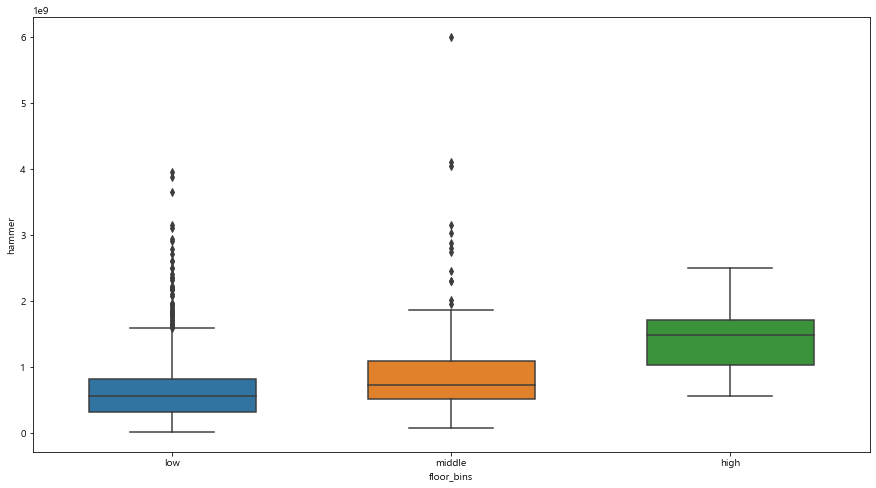

In [35]:
auction["floor_bins"]

plt.figure(figsize=(15,8))
sns.boxplot(x=auction["floor_bins"], y=auction["hammer"], data=auction, 
                saturation=0.75, width=0.6,
                fliersize=5)


In [54]:
auction[["floor", "floor_bins"]]

,floor,floor_bins
0,29.0,high
1,10.0,low
2,3.0,low
3,3.0,low
4,6.0,low
...,...,...
1090,3.0,low
1091,7.0,low
1092,5.0,low
1093,15.0,middle


Text(0, 0.5, '낙찰가')

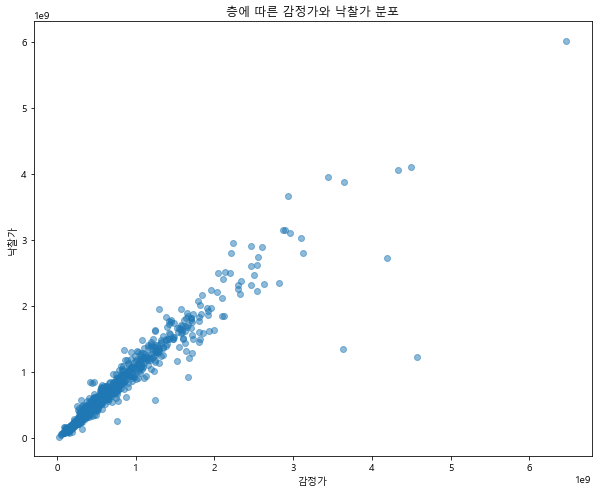

In [53]:
fig=plt.figure(figsize=(10,8))
ax= fig.add_subplot(1,1,1)
ax.scatter(auction["price"],auction["hammer"], alpha=0.5)
ax.set_title("층에 따른 감정가와 낙찰가 분포")
ax.set_xlabel("감정가")
ax.set_ylabel("낙찰가")